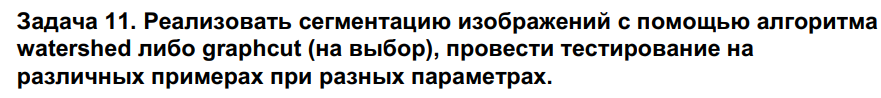

In [1]:
def imshow(img, title, color=False, fsize=(10,8)):
    
    plt.figure(figsize=fsize)
    plt.title(title)
    if color:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

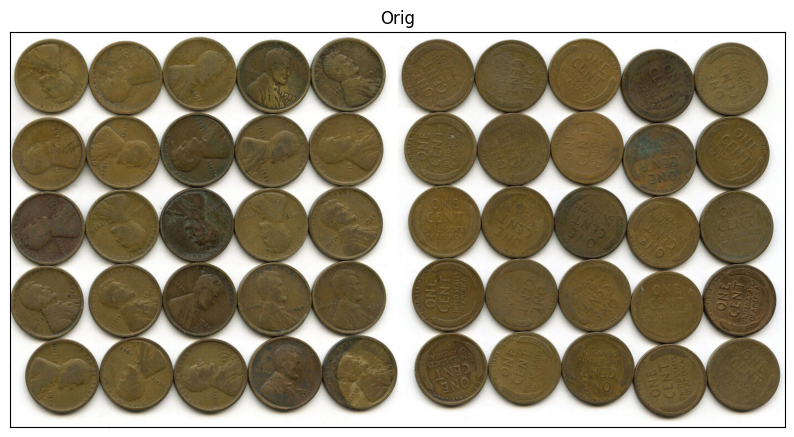

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('cents.jpg')
assert img is not None, "file could not be read"
imshow(img, 'Orig', True)

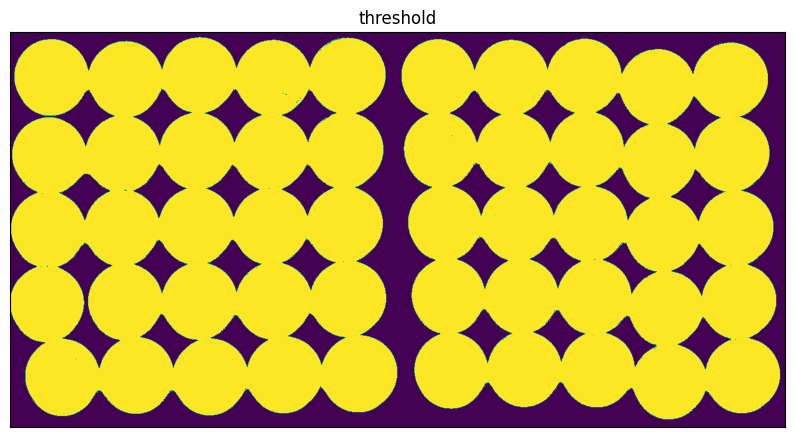

In [3]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 
                             0, 255,  
                             cv.THRESH_BINARY_INV + cv.THRESH_OTSU) 
imshow(thresh, 'threshold')

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

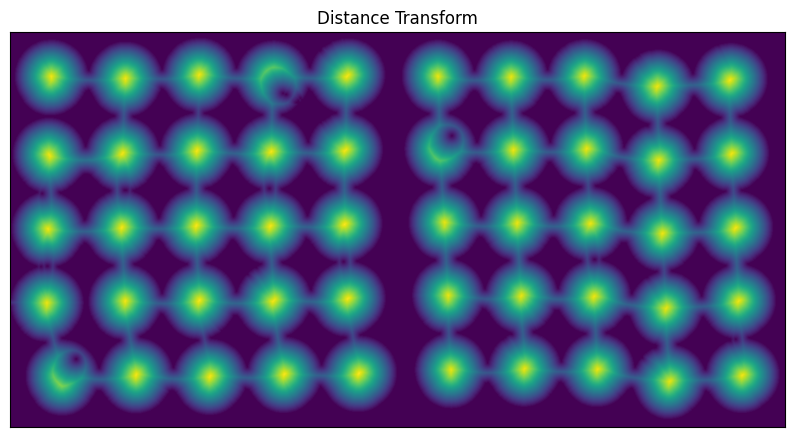

In [5]:
imshow(dist_transform, 'Distance Transform')

In [6]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

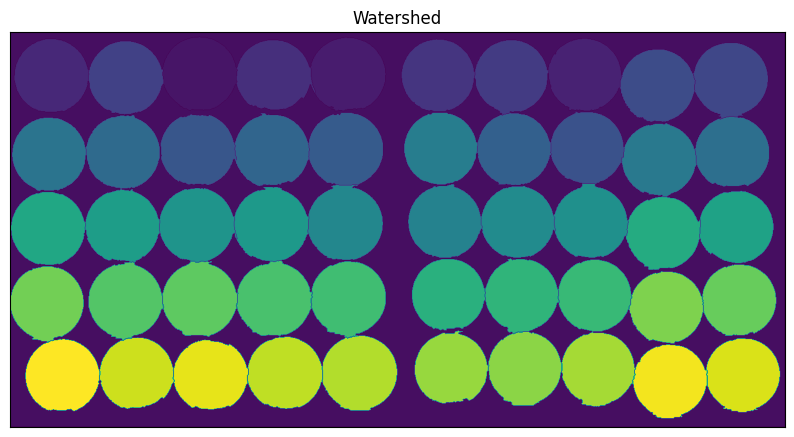

In [7]:
imshow(markers, 'Watershed')